In [1]:
from my_packages import *

In [5]:
folder2savefigure = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\scatterplot"
if not os.path.exists(folder2savefigure):
    os.makedirs(folder2savefigure)

In [3]:
filepath = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\scatterplot\s1a_tsx_scatterplot.csv"
df = pd.read_csv(filepath)
subdf = df.copy()
subdf.head(5)

,POINT_X,POINT_Y,PointKey,velocity_mm_per_day,velocity_mm_per_year,averaged_measurement,S1A_TSX_Ratio,geometry
0,178414.5360,2.630686e+06,X178414Y2630686,-0.155654,-56.852575,-74.723253,0.760842,POINT (178414.5360000003 2630686.1329)
1,178408.1106,2.630645e+06,X178408Y2630644,-0.205767,-75.156385,-74.723253,1.005796,POINT (178408.11060000025 2630644.761)
2,178975.6604,2.630623e+06,X178975Y2630623,0.035515,12.971693,30.498011,0.425329,POINT (178975.6604000004 2630623.3770000003)
3,179006.7361,2.630618e+06,X179006Y2630617,-0.073931,-27.003150,30.498011,0.885407,POINT (179006.73610000033 2630617.5210999995)
4,179039.3659,2.630611e+06,X179039Y2630611,-0.065310,-23.854582,-37.428792,0.637332,POINT (179039.36589999963 2630611.4464)


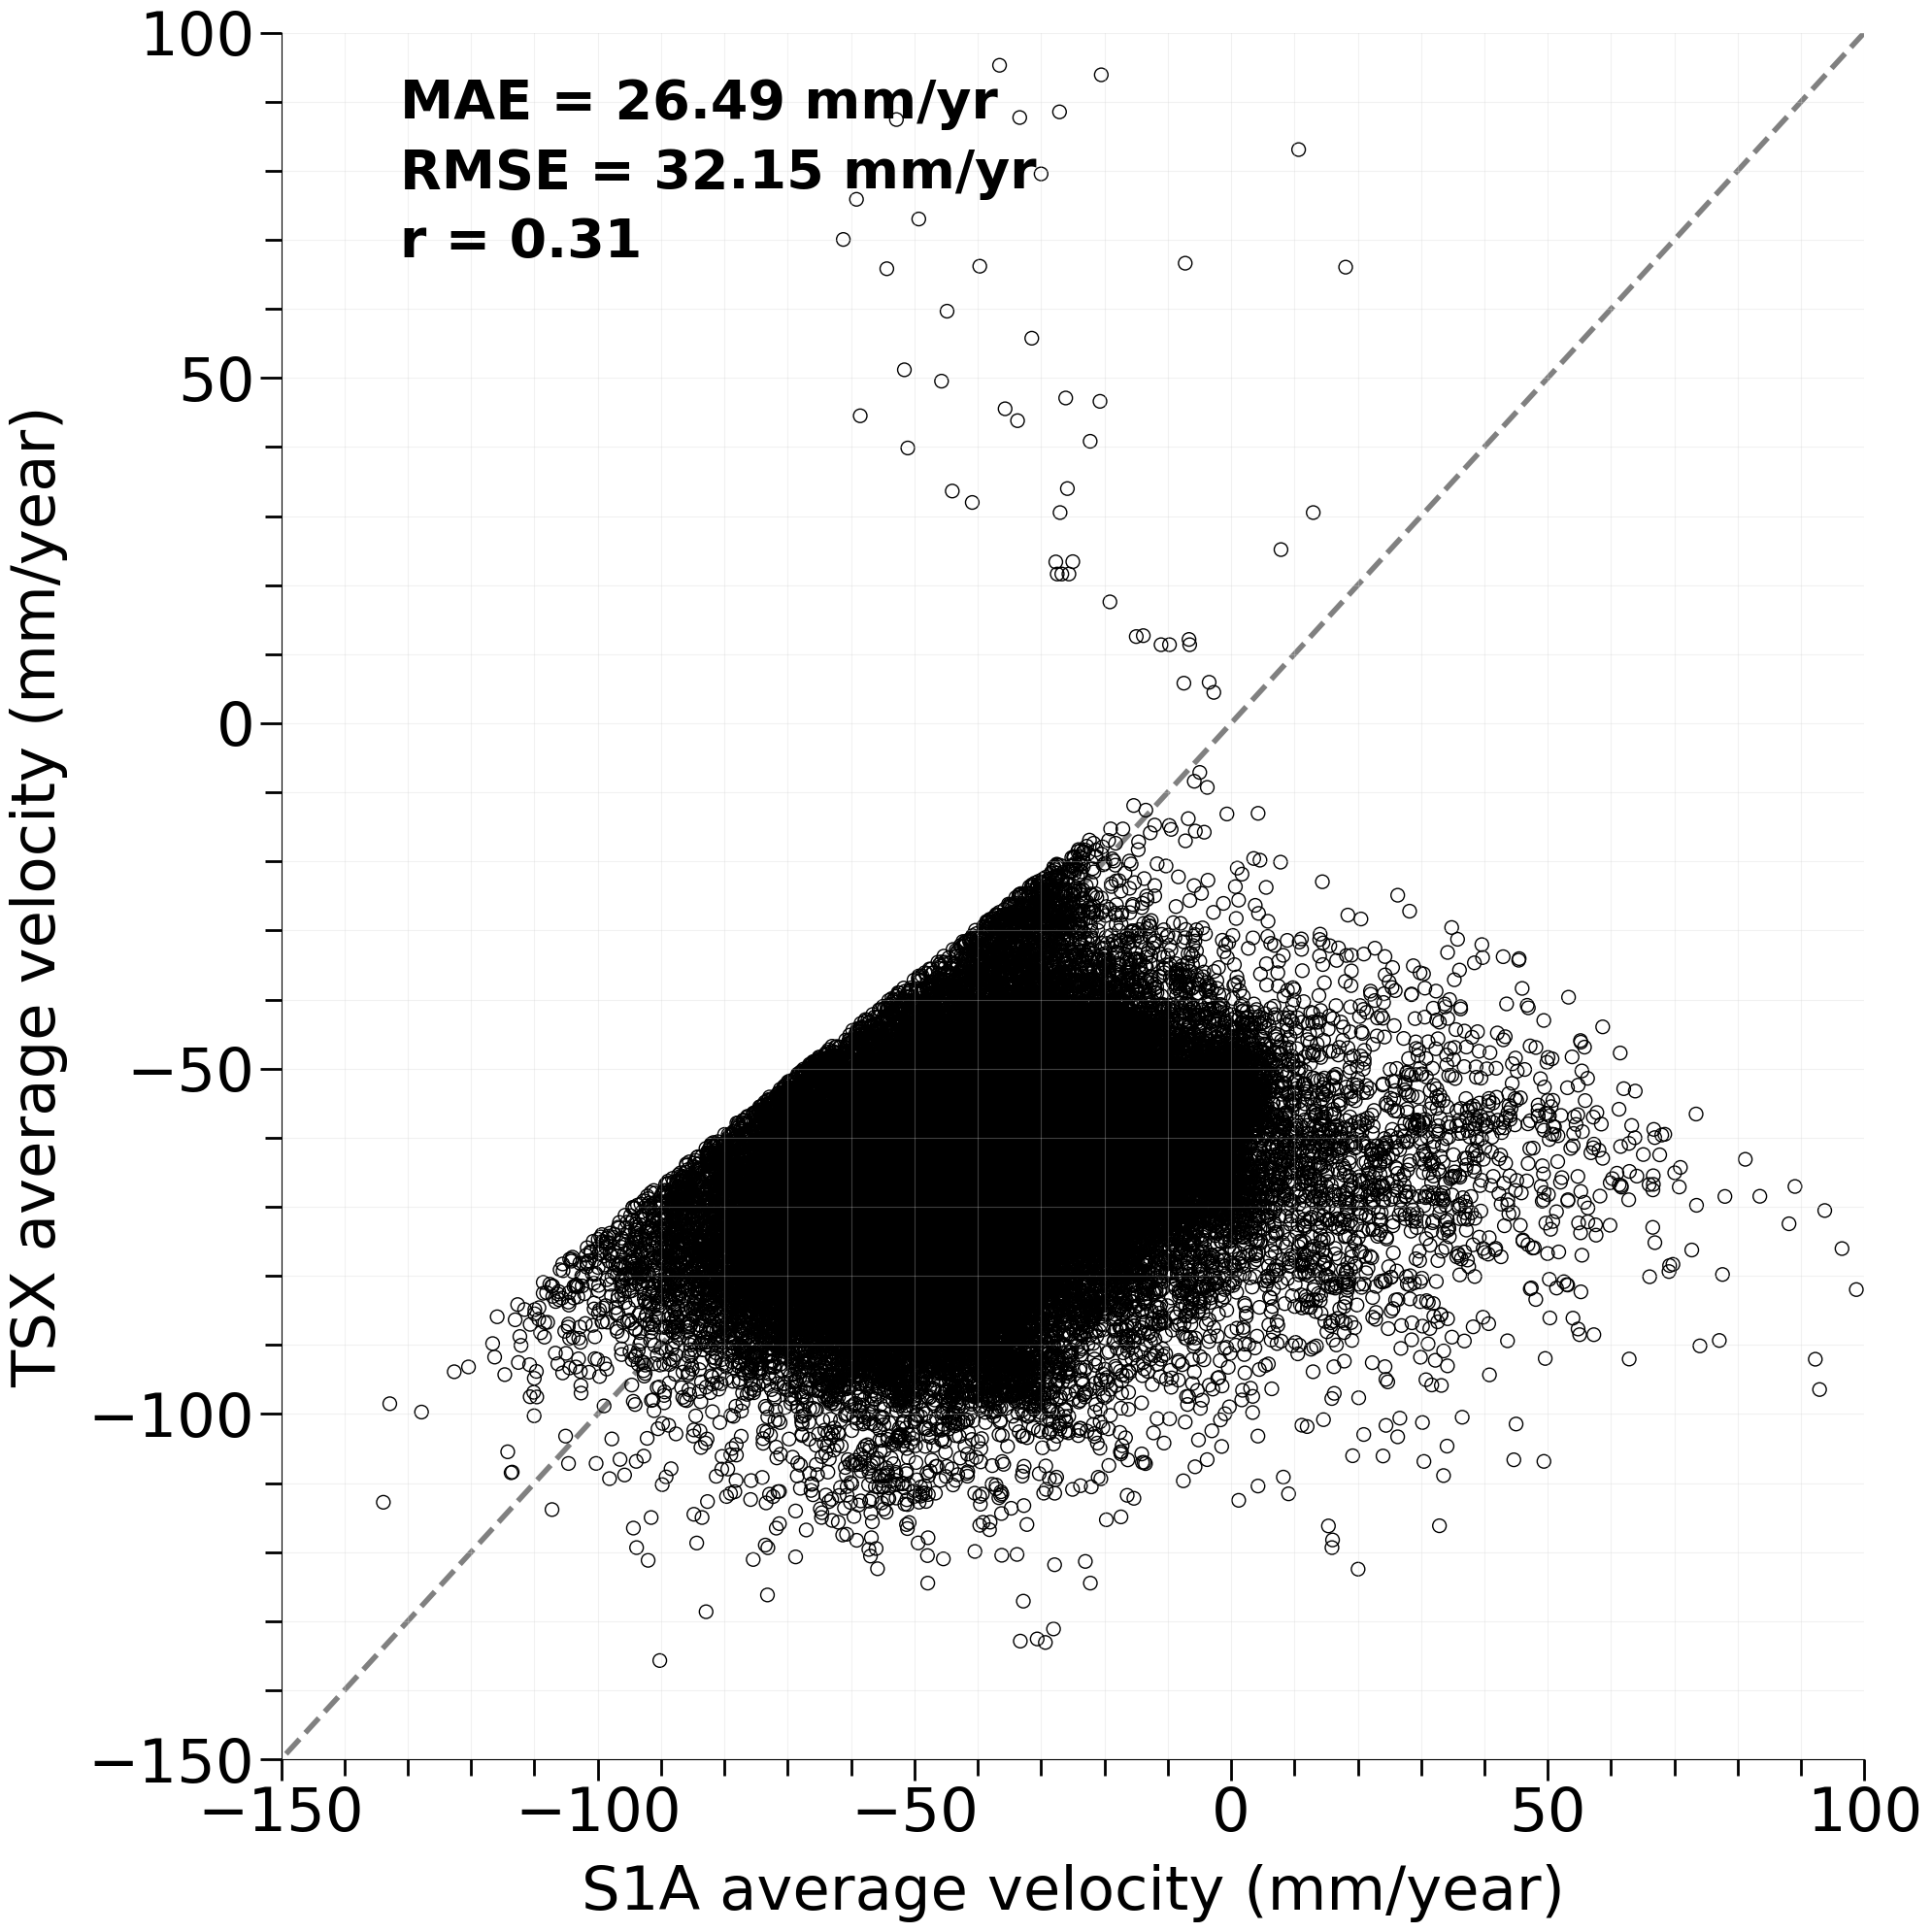

In [16]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

cm = 1/2.54
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis="both", which="both", color="lightgrey", alpha=0.3)
top_thres = 100
bot_thres = -150

x1, y1 = [top_thres, bot_thres], [top_thres, bot_thres]
ax.plot(x1, y1, linestyle="--", color="gray", linewidth=4, zorder=1)

ax.set_xlim(bot_thres, top_thres)
ax.set_ylim(bot_thres, top_thres)

# ax.set_aspect(aspect="equal", adjustable="box")

scatter_points = [(s1a, tsx) for s1a, tsx in zip(subdf["velocity_mm_per_year"], subdf["averaged_measurement"])]

scatter_plot = ax.scatter(
    *zip(*scatter_points), s=100, facecolors="none", edgecolors="black", marker="o"
)

x = subdf["velocity_mm_per_year"]
y = subdf["averaged_measurement"]

ax.set_xlabel("S1A average velocity (mm/year)", fontsize=45, labelpad=15)
ax.set_ylabel("TSX average velocity (mm/year)", fontsize=45, labelpad=15)

mean_abs_err = np.mean(np.abs(x - y))
rmse = np.sqrt(np.mean((x - y) ** 2))
m, c, r, p, se1 = stats.linregress(x, y)

major_base = 50
minor_base = 10

x_major_loc = plticker.MultipleLocator(base=major_base)
x_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

y_major_loc = plticker.MultipleLocator(base=major_base)
y_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.yaxis.set_major_locator(y_major_loc)
ax.yaxis.set_minor_locator(y_minor_loc)

ax.tick_params(axis="y", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="y", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.tick_params(axis="x", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="x", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.text(
    0.075,
    0.95,
    f"MAE = {mean_abs_err:.2f} mm/yr",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)
ax.text(
    0.075,
    0.91,
    f"RMSE = {rmse:.2f} mm/yr",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.text(
    0.075,
    0.87,
    f"r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

base = "Leveling_PSC_LinearVelocity"

for i in range(1, 1001):
    savename = os.path.join(folder2savefigure, base + "_{}.png".format(str(i).zfill(3)))
    if os.path.exists(savename):
        continue
    else:
        break

plt.savefig(
    savename,
    dpi=300,
    transparent=False,
    facecolor="w",
    edgecolor="w",
    bbox_inches="tight",
)
# plt.close()
plt.show()